# DIABETES PREDICTION MODEL

# EXPLORATORY DATA ANALYSIS, DATA PREPROCESSING AND FEATURE ENGINEERING

'''
In this project we will try to predict if the person has diabetes has or not.

Steps for Exploratory Data Analysis, Data Visualization, Data Preprocessing and Feature Engineering:

    - GENERAL / GENERAL OVERVIEW / GENERAL PICTURE
    - NUMERICAL VARIABLE ANALYSIS
        describe with quantiles to see whether there are extraordinary values or not
        Basic visualization by using histograms
    - TARGET ANALYSIS
        Target analysis according to categorical variables --> target_summary_with_cats()
        Target analysis according to numerical variables --> target_summary_with_nums()
    - ANALYSIS OF NUMERCIAL VARIABLES IN COMPARISON WITH EACH OTHER
        scatterplot
        lmplot
        correlation
    - Outlier Analysis
    - Missing Values Analysis
    - New Features Creation
    - Label and One Hot Encoding
    - Standardization
    - Saving the Dataset
'''

In [1]:


# Import dependencies
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

import warnings
warnings.simplefilter(action="ignore")
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [28]:

# Load the dataset
diabetes = pd.read_csv(r'diabetes.csv')
df = diabetes.copy()
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0              6      148             72             35        0 33.600   
1              1       85             66             29        0 26.600   
2              8      183             64              0        0 23.300   
3              1       89             66             23       94 28.100   
4              0      137             40             35      168 43.100   
..           ...      ...            ...            ...      ...    ...   
763           10      101             76             48      180 32.900   
764            2      122             70             27        0 36.800   
765            5      121             72             23      112 26.200   
766            1      126             60              0        0 30.100   
767            1       93             70             31        0 30.400   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# Beacuse we do not have many variables, we can follow the same procedure for each variable.
# Note that all the variables are numerical.

In [29]:

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


count    mean     std    min    10%    25%     50%  \
Pregnancies              768.000   3.845   3.370  0.000  0.000  1.000   3.000   
Glucose                  768.000 120.895  31.973  0.000 85.000 99.000 117.000   
BloodPressure            768.000  69.105  19.356  0.000 54.000 62.000  72.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  23.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  30.500   
BMI                      768.000  31.993   7.884  0.000 23.600 27.300  32.000   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.165  0.244   0.372   
Age                      768.000  33.241  11.760 21.000 22.000 24.000  29.000   
Outcome                  768.000   0.349   0.477  0.000  0.000  0.000   0.000   

                             75%     90%     95%     99%     max  
Pregnancies                6.000   9.000  10.000  13.000  17.000  
Glucose                  140.250 167.000 181.000 196.000 199.000  
BloodPressure             80.000  88.000  90.000 106.000 122.000  
SkinThickness             32.000  40.000  44.000  51.330  99.000  
Insulin                  127.250 210.000 293.000 519.900 846.000  
BMI                       36.600  41.500  44.395  50.759  67.100  
DiabetesPedigreeFunction   0.626   0.879   1.133   1.698   2.420  
Age                       41.000  51.000  58.000  67.000  81.000  
Outcome                    1.000   1.000   1.000   1.000   1.000

In [4]:
df.corr()

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                     1.000    0.129          0.141         -0.082   
Glucose                         0.129    1.000          0.153          0.057   
BloodPressure                   0.141    0.153          1.000          0.207   
SkinThickness                  -0.082    0.057          0.207          1.000   
Insulin                        -0.074    0.331          0.089          0.437   
BMI                             0.018    0.221          0.282          0.393   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Age                             0.544    0.264          0.240         -0.114   
Outcome                         0.222    0.467          0.065          0.075   

                          Insulin   BMI  DiabetesPedigreeFunction    Age  \
Pregnancies                -0.074 0.018                    -0.034  0.544   
Glucose                     0.331 0.221                     0.137  0.264   
BloodPressure               0.089 0.282                     0.041  0.240   
SkinThickness               0.437 0.393                     0.184 -0.114   
Insulin                     1.000 0.198                     0.185 -0.042   
BMI                         0.198 1.000                     0.141  0.036   
DiabetesPedigreeFunction    0.185 0.141                     1.000  0.034   
Age                        -0.042 0.036                     0.034  1.000   
Outcome                     0.131 0.293                     0.174  0.238   

                          Outcome  
Pregnancies                 0.222  
Glucose                     0.467  
BloodPressure               0.065  
SkinThickness               0.075  
Insulin                     0.131  
BMI                         0.293  
DiabetesPedigreeFunction    0.174  
Age                         0.238  
Outcome                     1.000

In [5]:
profile = ProfileReport(df, title="Flights Data Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

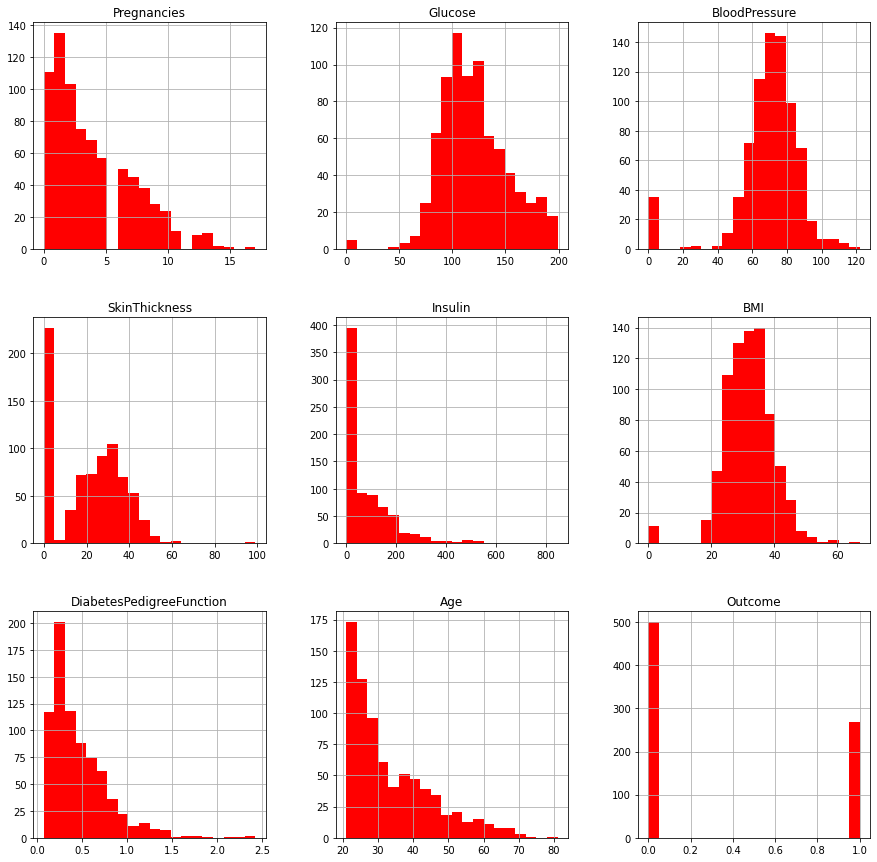

In [7]:
## NUMERICAL VARIABLES ANALYSIS

# Plot histograms for the dataset
df.hist(bins=20, figsize=(15, 15), color='r')
plt.show()

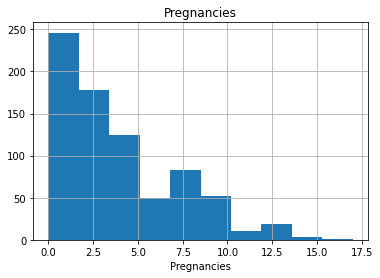

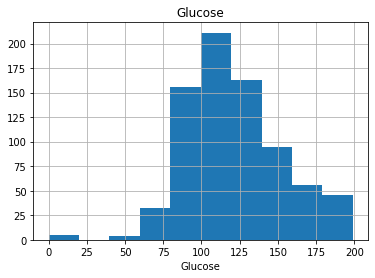

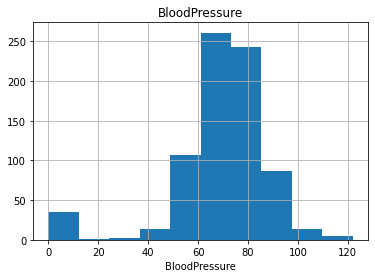

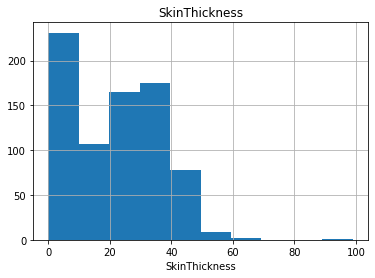

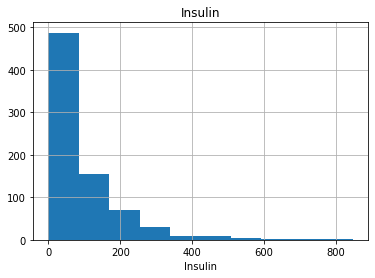

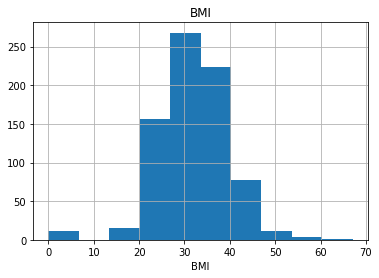

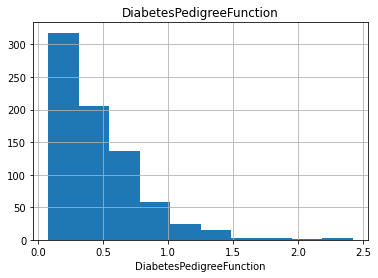

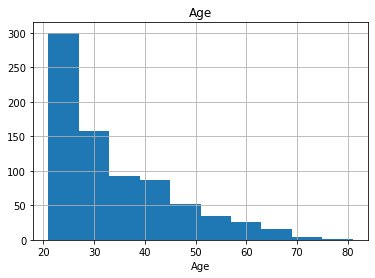

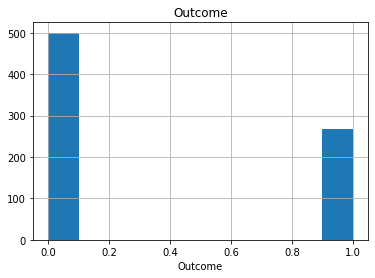

9 variables have been plotted


In [8]:
# Function to plot histograms for numerical variables
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=10)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, df.columns)


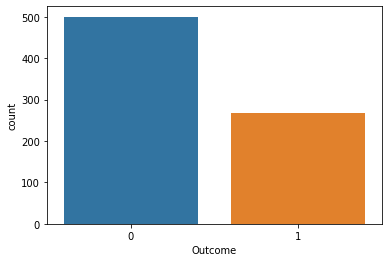

        Pregnancies       
               mean median
Outcome                   
0             3.298  2.000
1             4.866  4.000
        Glucose        
           mean  median
Outcome                
0       109.980 107.000
1       141.257 140.000
        BloodPressure       
                 mean median
Outcome                     
0              68.184 70.000
1              70.825 74.000
        SkinThickness       
                 mean median
Outcome                     
0              19.664 21.000
1              22.164 27.000
        Insulin       
           mean median
Outcome               
0        68.792 39.000
1       100.336  0.000
           BMI       
          mean median
Outcome              
0       30.304 30.050
1       35.143 34.250
        DiabetesPedigreeFunction       
                            mean median
Outcome                                
0                          0.430  0.336
1                          0.550  0.449
           Age       
        

In [9]:
## TARGET ANALYSIS

df["Outcome"].value_counts()

# See how many 0 and 1 values in the dataset and if there is imbalance
sns.countplot(x='Outcome', data=df)
plt.show()

# Look at the mean and meadian for each variable groupped by Outcome
for col in df.columns:
    print(df.groupby("Outcome").agg({col: ["mean", "median"]}))

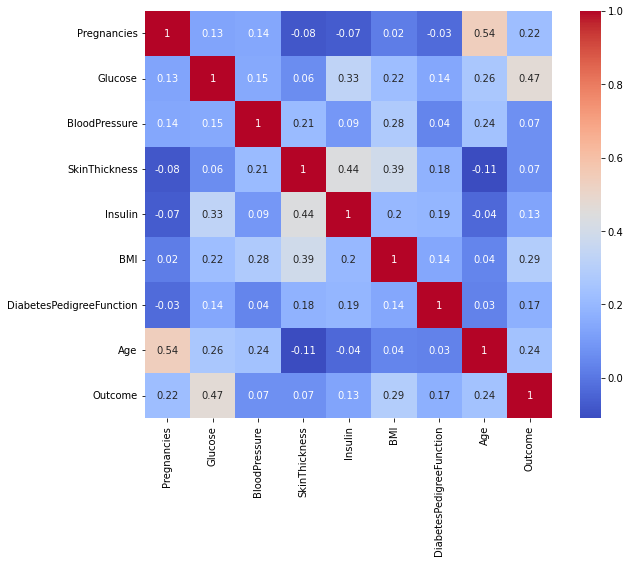

In [30]:
## ANALYSIS OF NUMERCIAL VARIABLES IN COMPARISON WITH EACH OTHER

# Show the scatterplots for each variable and add teh dimension for Outcome, so we can differentiate between classes.
# sns.pairplot(df, hue='Outcome');
# plt.show()

# Show the correlation matrix
plt.subplots(figsize=(10,7.5))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, square=True);
plt.show()

In [11]:
## MISSING VALUES ANALYSIS

# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)

# It seems, that there are no missing values in our dataset. (That makes me suspicious)
# However, after delving deep into the dataset, we realized that there are actually missing values, but they are written as '0'.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

'''
On these columns, a value of zero does not make sense and thus indicates missing value.
Following columns or variables have an invalid zero value:
    - Glucose
    - BloodPressure
    - SkinThickness
    - Insulin
    - BMI
'''


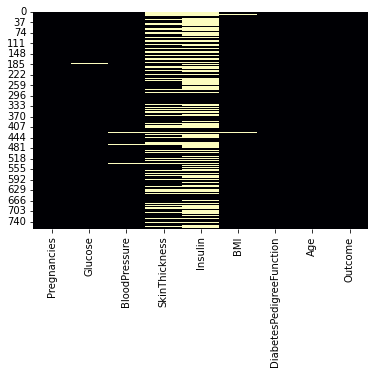

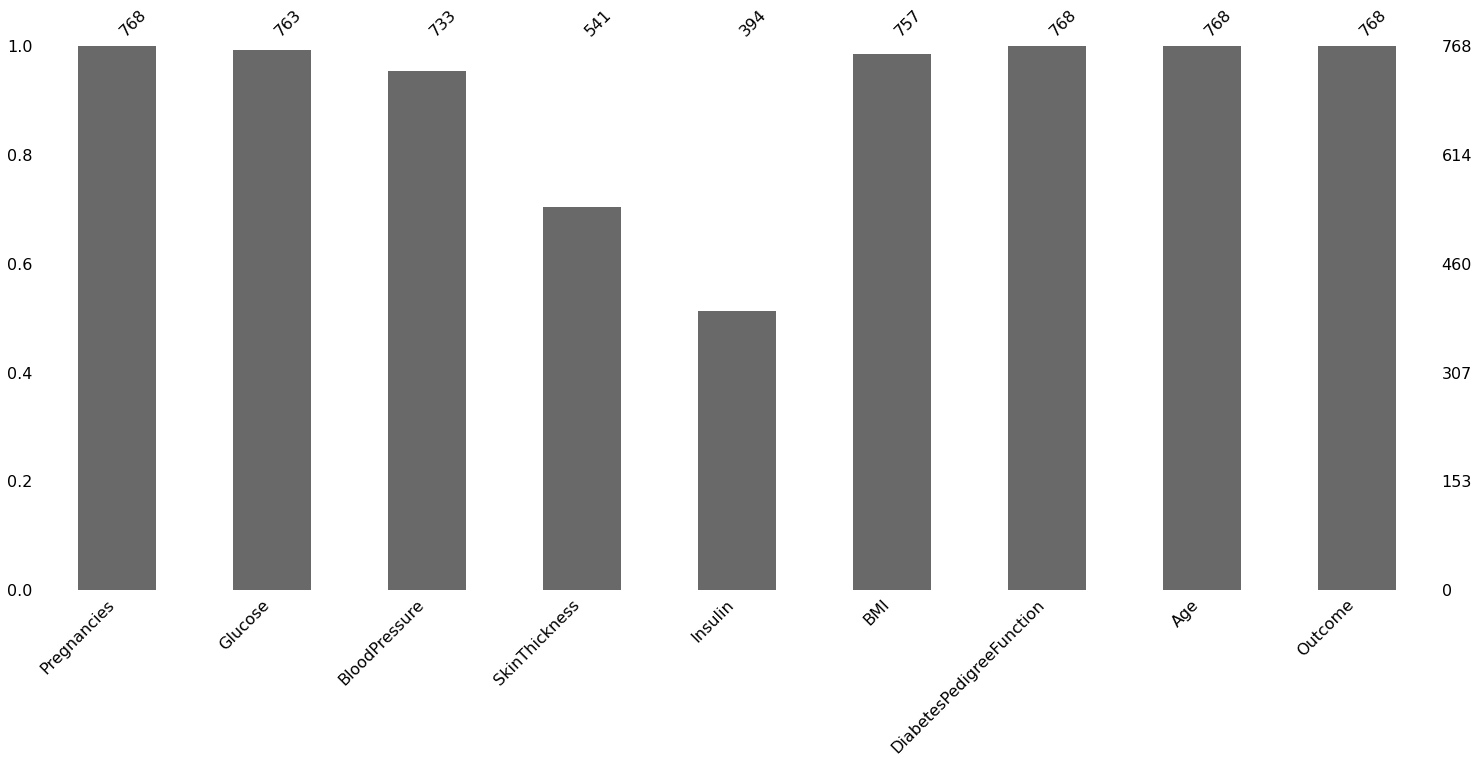

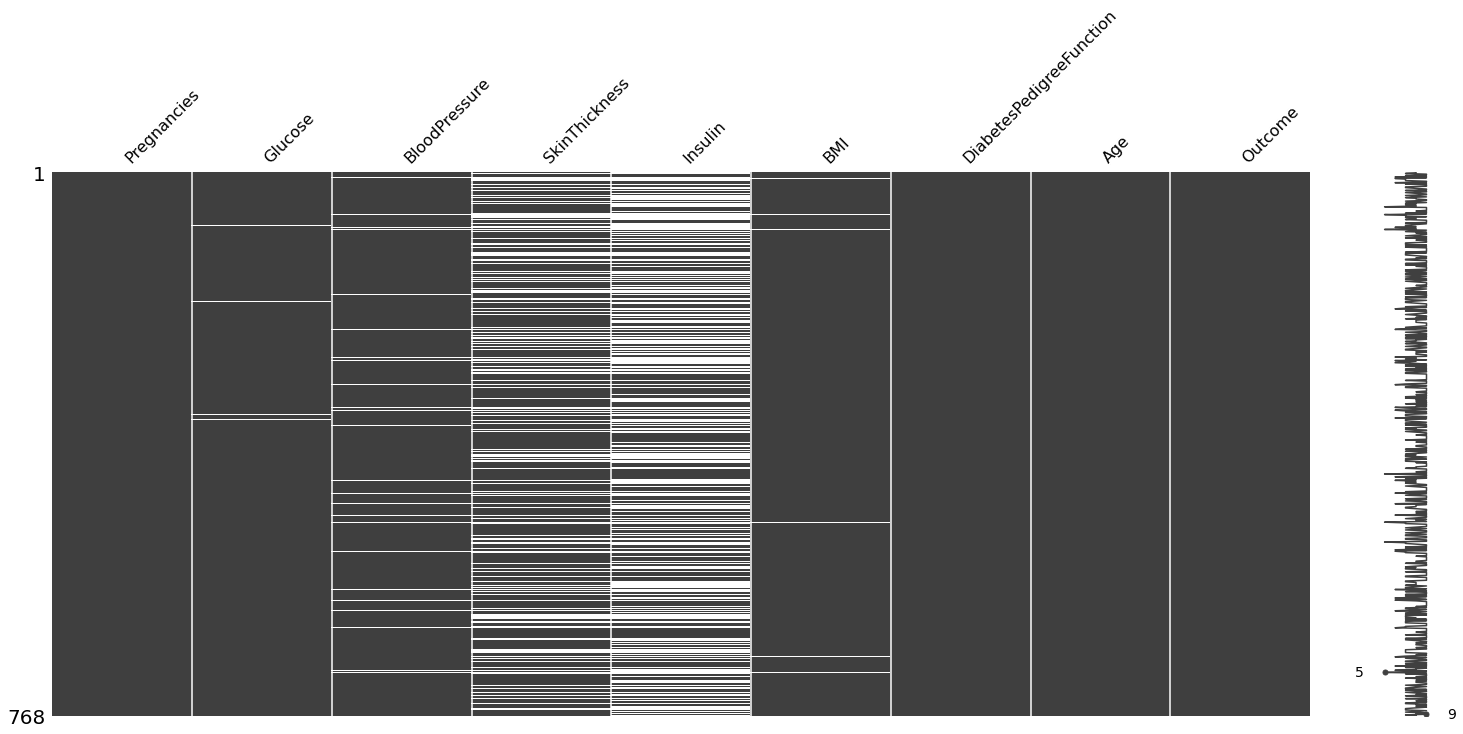

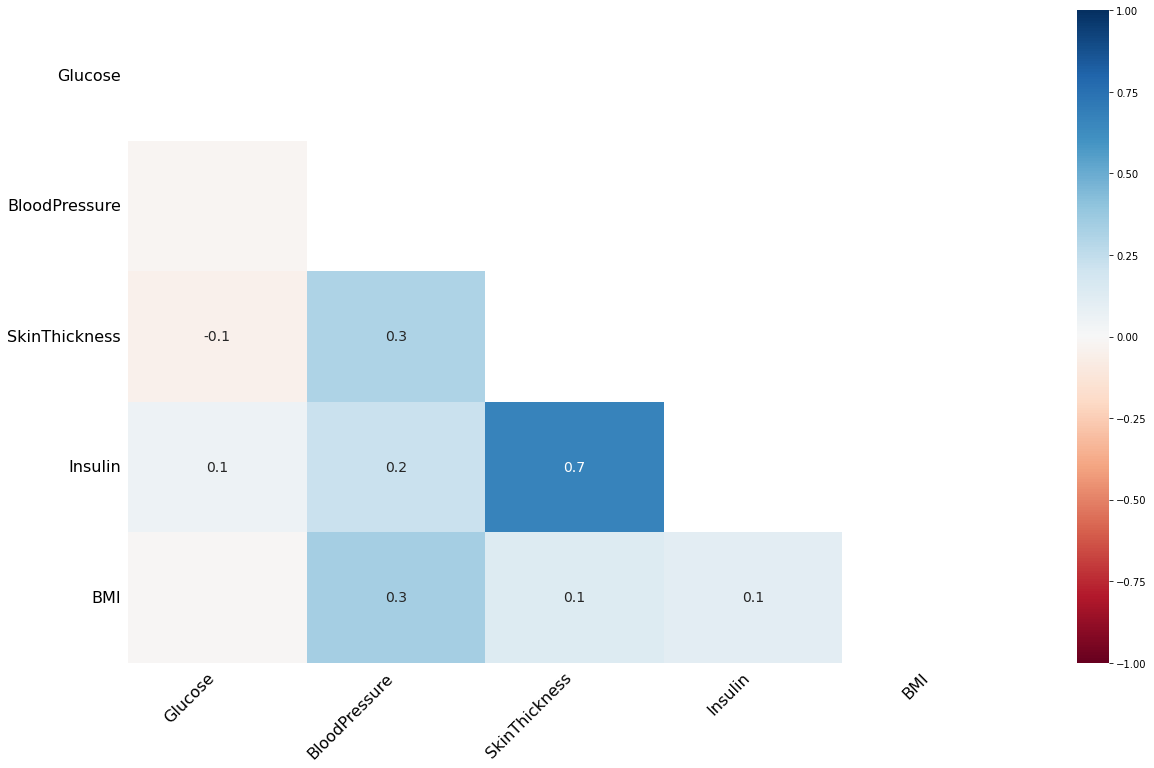

In [31]:
# Let's correct the errors in the dataset.
variables_with_na = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in variables_with_na:
    df[col] = df[col].apply(lambda x: np.NaN if x == 0 else x)
# Check for missing values, again.
df.isnull().sum().sort_values(ascending=False)

# Visualize missing variables
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.show()
# Missing values overall view
msno.bar(df)
plt.show()
# Now, we can see the relationship between missing values
msno.matrix(df)
plt.show()
# Nullity correlation visualization
msno.heatmap(df)
plt.show()


In [32]:
# Impute median values for missing values for numeral variables with respect to their class
# df = df.apply(lambda x: x.fillna(x.median()), axis=0)
for col in variables_with_na:
    df[col] = df[col].fillna(df.groupby("Outcome")[col].transform("median"))

# Check for missing values, again and control
df.isnull().sum()
df.isnull().sum().sum() # 0


0

## FEATURE CREATION

In [33]:


# Create BMI ranges
df['BMIRanges'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=["Underweight", "Healthy", "Overweight", "Obese"])
df['BMIRanges'] = df['BMIRanges'].astype(str)
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6  148.000         72.000         35.000  169.500 33.600   
1            1   85.000         66.000         29.000  102.500 26.600   
2            8  183.000         64.000         32.000  169.500 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DiabetesPedigreeFunction  Age  Outcome   BMIRanges  
0                     0.627   50        1       Obese  
1                     0.351   31        0  Overweight  
2                     0.672   32        1     Healthy  
3                     0.167   21        0  Overweight  
4                     2.288   33        1       Obese

In [34]:

# See the results for the new feature
df.groupby(["Outcome", "BMIRanges"]).describe()
df[['BMIRanges']].value_counts()
df.groupby(["BMIRanges"]).agg({"Outcome": [np.mean, np.count_nonzero, np.size]}) # Super!


Outcome                   
               mean count_nonzero size
BMIRanges                             
Healthy       0.065             7  108
Obese         0.456           217  476
Overweight    0.244            44  180
Underweight   0.000             0    4

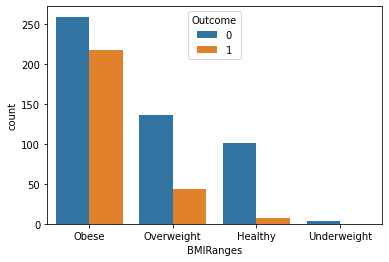

In [35]:
# See the counts for each class that we created
sns.countplot(x='BMIRanges', hue='Outcome', data=df)
plt.show()

In [36]:

# Create Age ranges --> young, mid_aged, old
df['Age'].describe()
df['AgeRanges'] = pd.cut(x=df['Age'], bins=[15, 25, 65, 81], labels=["Young", "Mid_Aged", "Senior"])
df['AgeRanges'] = df['AgeRanges'].astype(str)
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6  148.000         72.000         35.000  169.500 33.600   
1            1   85.000         66.000         29.000  102.500 26.600   
2            8  183.000         64.000         32.000  169.500 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DiabetesPedigreeFunction  Age  Outcome   BMIRanges AgeRanges  
0                     0.627   50        1       Obese  Mid_Aged  
1                     0.351   31        0  Overweight  Mid_Aged  
2                     0.672   32        1     Healthy  Mid_Aged  
3                     0.167   21        0  Overweight     Young  
4                     2.288   33        1       Obese  Mid_Aged

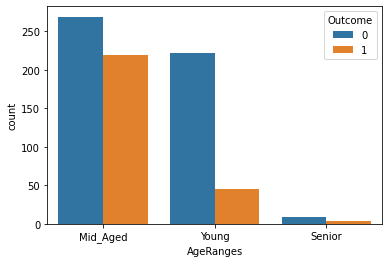

Outcome                   
             mean count_nonzero size
AgeRanges                           
Mid_Aged    0.449           219  488
Senior      0.308             4   13
Young       0.169            45  267

In [37]:
# See the counts for each class that we created
sns.countplot(x='AgeRanges', hue='Outcome', data=df)
plt.show()


# See the results for the new feature
df.groupby(["Outcome", "AgeRanges"]).describe()
df[['AgeRanges']].value_counts()
df.groupby(["AgeRanges"]).agg({"Outcome": [np.mean, np.count_nonzero, np.size]}) # Super!

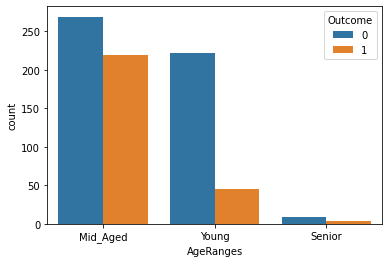

Outcome                   
                 mean count_nonzero size
GlucoseLevels                           
High            0.607           176  290
Low             0.000             0   11
Normal          0.077            14  181
Secret          0.273            78  286

In [38]:
# Create Insulin/Glucose ranges --> low, normla, secret, high
df['Glucose'].describe()
df['GlucoseLevels'] = pd.cut(x=df['Glucose'], bins=[0, 70, 99, 126, 200], labels=["Low", "Normal", "Secret", "High"])
df['GlucoseLevels'] = df['GlucoseLevels'].astype(str)
df.head()

# See the counts for each class that we created
sns.countplot(x='AgeRanges', hue='Outcome', data=df)
plt.show()

# See the results for the new feature
df.groupby(["Outcome", "GlucoseLevels"]).describe()
df[['GlucoseLevels']].value_counts()
df.groupby(["GlucoseLevels"]).agg({"Outcome": [np.mean, np.count_nonzero, np.size]}) # Super!


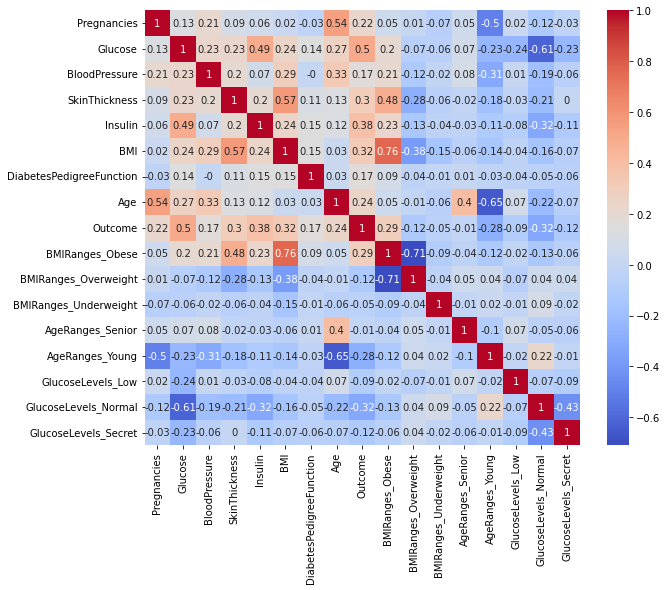

In [42]:
# Show the correlation matrix
plt.subplots(figsize=(10,8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, square=True);
plt.show()

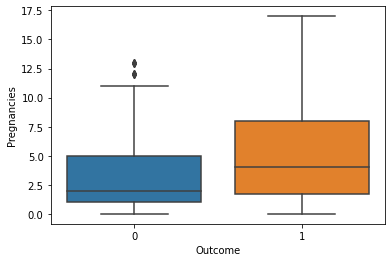

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMIRanges                 768 non-null    object 
 10  AgeRanges                 768 non-null    object 
 11  GlucoseLevels             768 non-null    object 
 12  Pregnancies/Age           768 non-null    float64
dtypes: float64(7), int64(3), object(3)
memory usage: 78.1+ KB


In [21]:

# Create a feature that shows the ratio of pregnancies/age
df['Pregnancies/Age'] = df['Pregnancies'] / df['Age']
df['Pregnancies/Age'].describe()

# See the results for the new feature
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.show()

df.info()

In [41]:
## LABEL AND ONE HOT ENCODING


# Catch numerical variables
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
len(cat_cols)


# Define a function to apply one hot encoding to categorical variables.
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=False, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


df, new_cols_ohe = one_hot_encoder(df, cat_cols)
df.head()
len(new_cols_ohe)

df.info()

# Export the dataset for later use by modeling
df.to_csv(r'diabetes_prepared.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMIRanges_Obese           768 non-null    uint8  
 10  BMIRanges_Overweight      768 non-null    uint8  
 11  BMIRanges_Underweight     768 non-null    uint8  
 12  AgeRanges_Senior          768 non-null    uint8  
 13  AgeRanges_Young           768 non-null    uint8  
 14  GlucoseLev